In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/Mall_Customers.csv


In [2]:
df= pd.read_csv("../input/customer-segmentation/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.drop("CustomerID",axis=1,inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

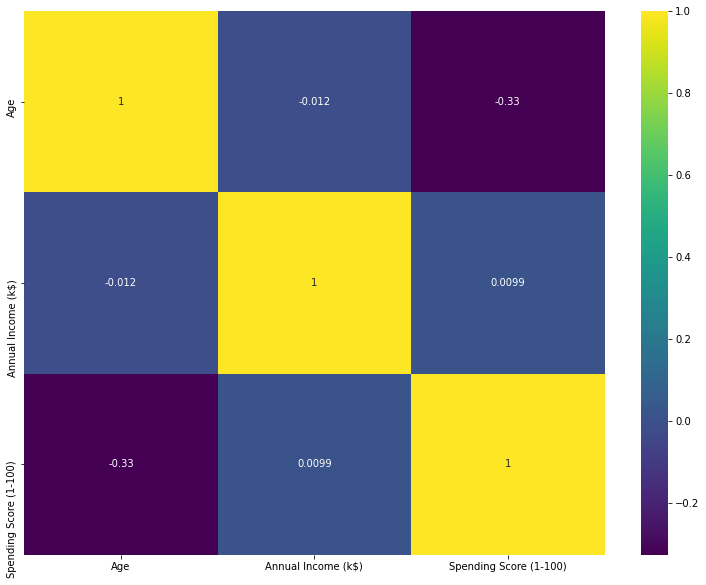

In [7]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, cmap="viridis")

In [8]:
df=pd.get_dummies(data=df, columns=["Genre"],drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [9]:
X= df.values
X.shape

(200, 4)

## 1. KMeans Clustering

<font color="blue">
1.1. How KMeans Clustering Works:

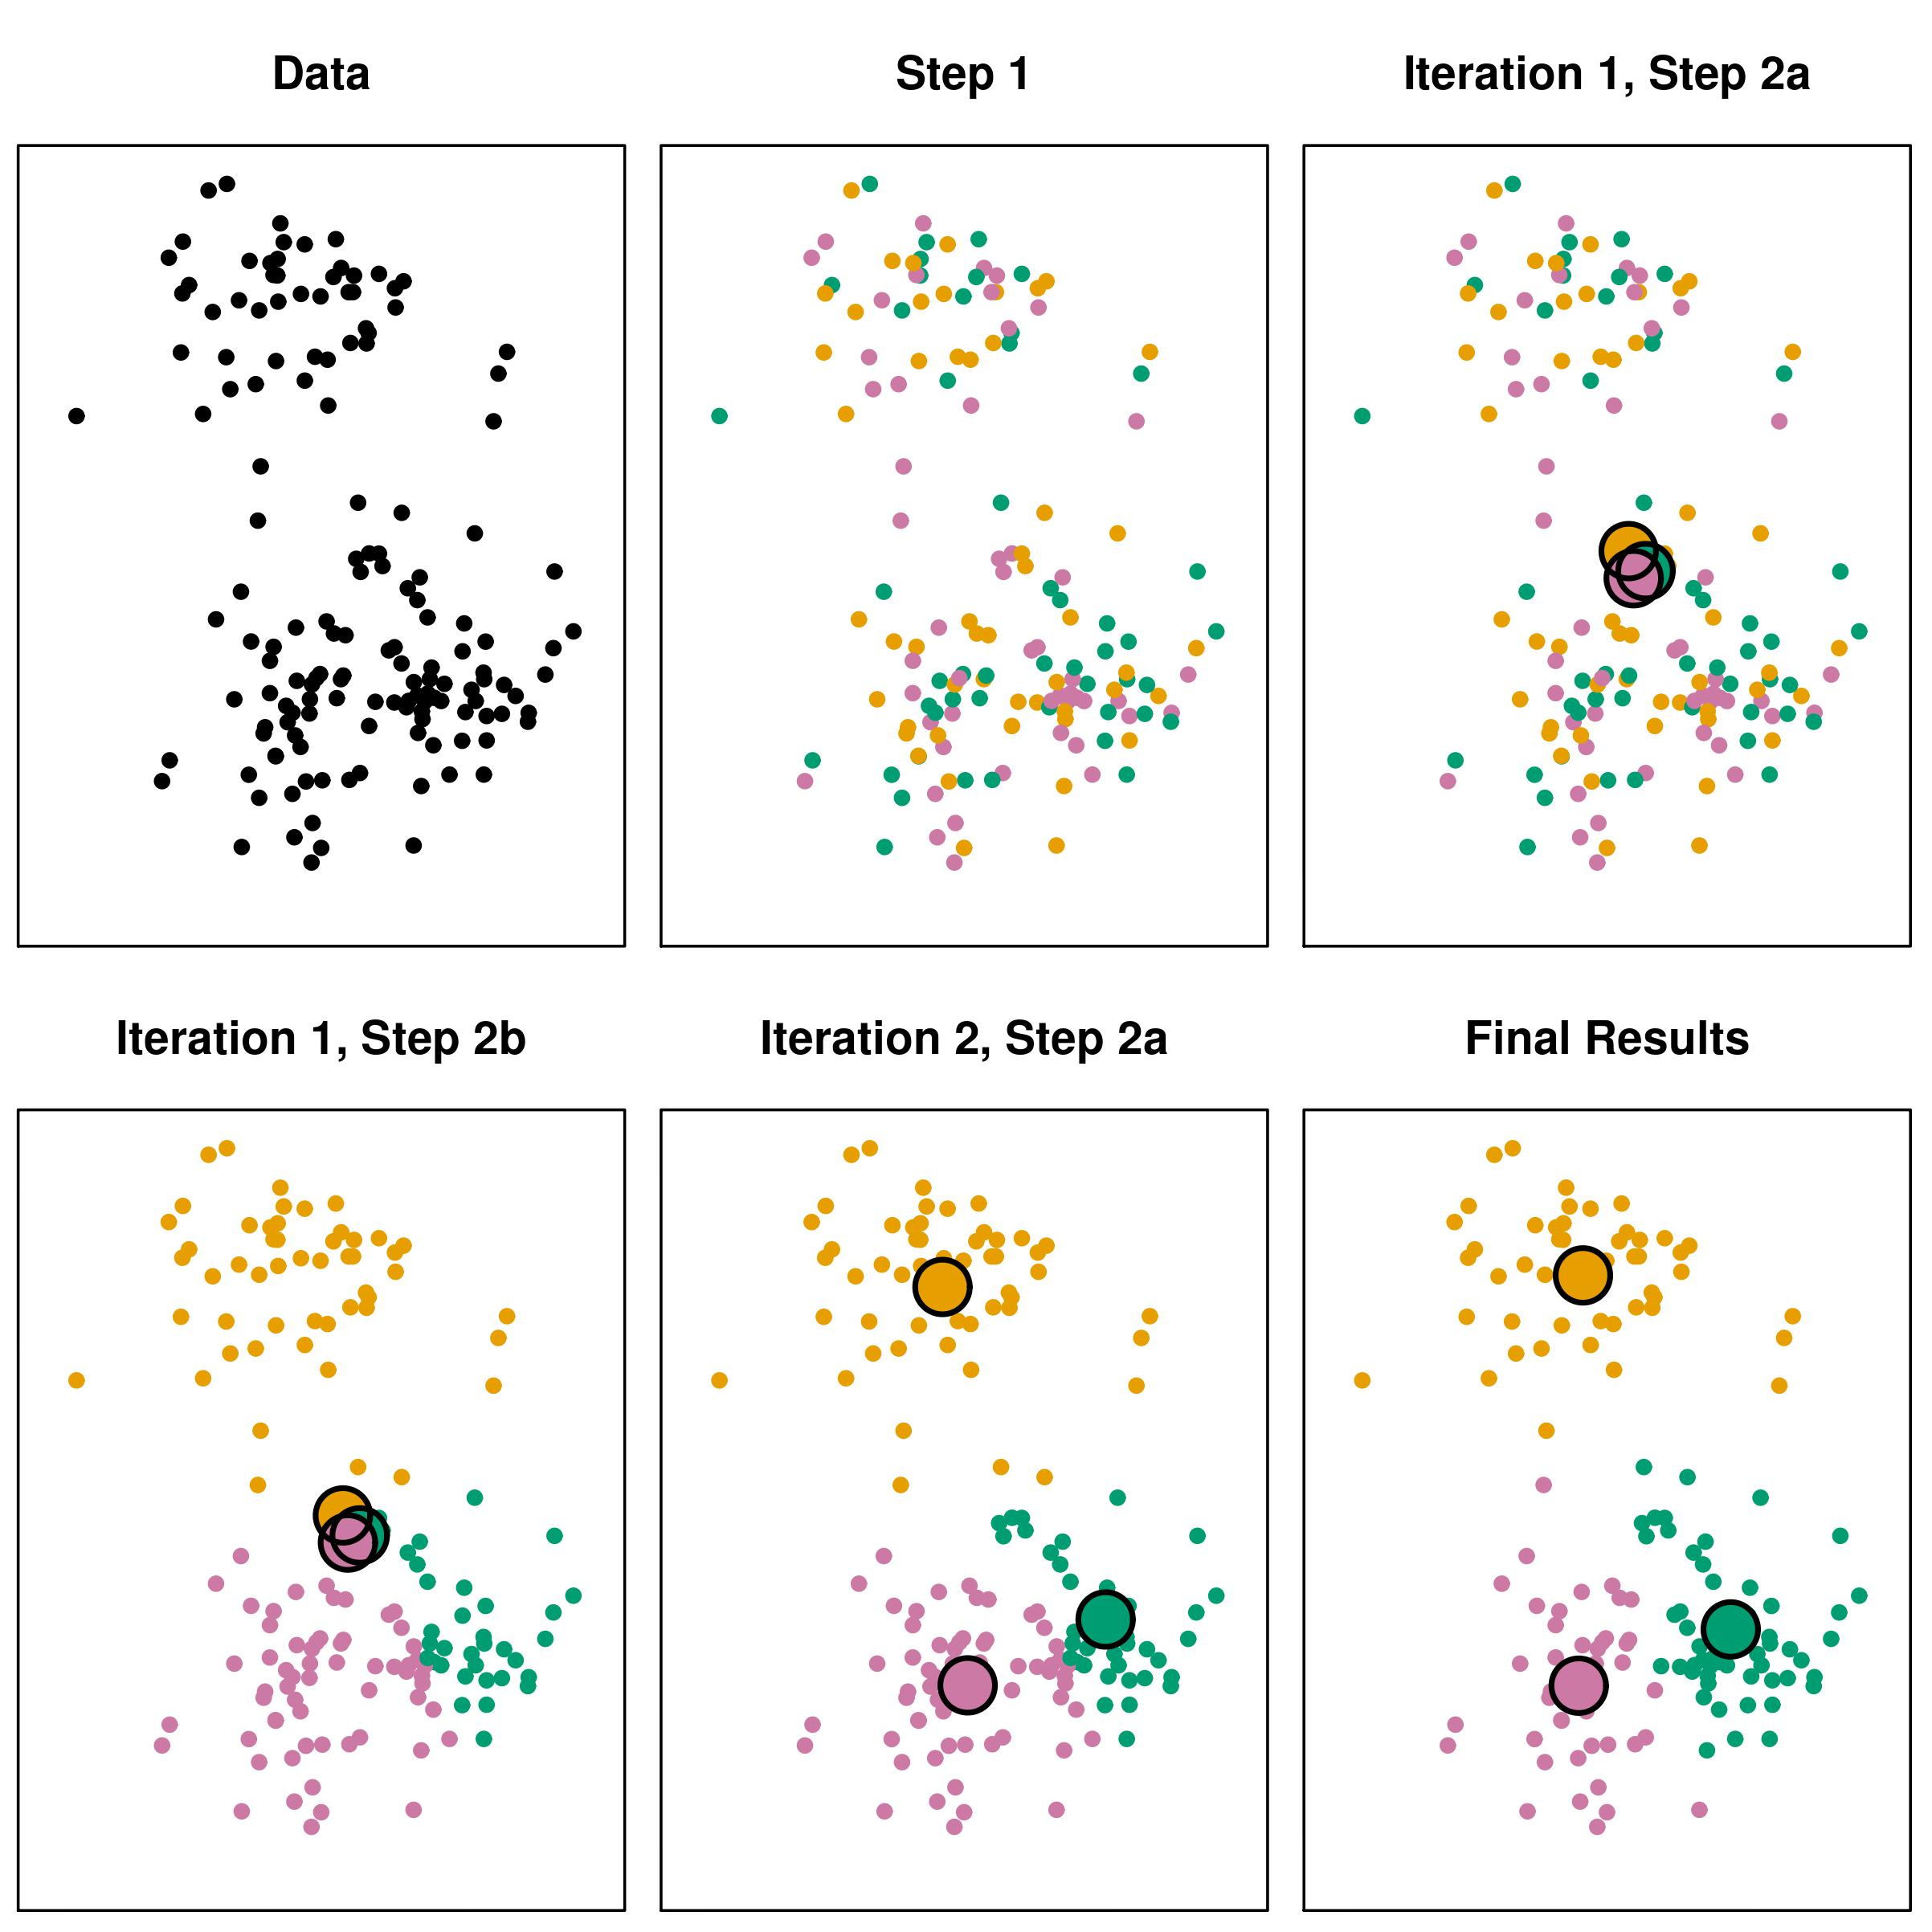

In [10]:
from IPython.display import Image
url="https://i.stack.imgur.com/FQhxk.jpg"
Image(url,width=800, height=800)

<font color="blue">
In the step 1 in the algorithm, each observation is randomly assigned to a cluster.

In the step 2a in the algorithm,the cluster centroid for each cluster is computed, which are shown as large colored disk as shown top-right of the figure.

Initially these centroids are almost overlapping as we can see from the figure because initial cluster assignments are chosen randomly.

In the step 2a in the algorithm(bottom-left of the figure above), each observation is assigned to the nearest centroid.

In bottom-center of the figure above, step 2a once again is performed which lead to new cluster centroids.

We basically keep repeating these steps until there is no new cluster which means data points are being reassigned to a new cluster centroid.

At the bottom-right, we have the results obtained after about 10 iterations

<font color="blue">
1.2. Implementation of the Algorithm

In [11]:
from sklearn.cluster import KMeans

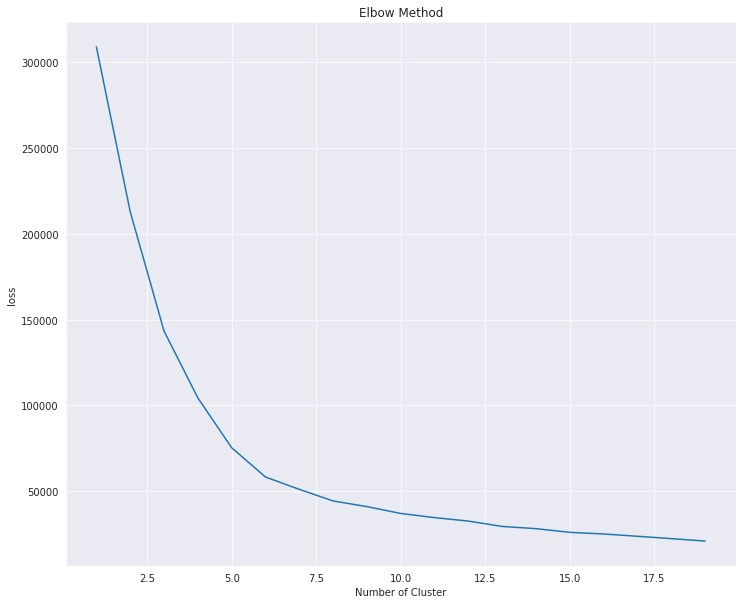

In [12]:
loss=list()
for i in range(1,20):
    kmeans=KMeans(n_clusters= i, init="k-means++")
    kmeans.fit(X)
    loss.append(kmeans.inertia_)
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
plt.plot(range(1,20), loss)
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")  
plt.ylabel("loss")
plt.show()
#As we can see, we can have best cluster value when number of cluster is equal to 5

In [13]:
print(kmeans.inertia_)

21021.941773504266


In [14]:
kmeans=KMeans(n_clusters=5, init="k-means++")
my_clusters=kmeans.fit_predict(X)

In [15]:
cluster_df=pd.DataFrame(my_clusters,columns=["KMeans Clusters"])
cluster_df

,KMeans Clusters
0,4
1,2
2,4
3,2
4,4
...,...
195,1
196,3
197,1
198,3


In [16]:
new_df=pd.concat([df, cluster_df], axis=1)
new_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,KMeans Clusters
0,19,15,39,1,4
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,2
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,3
197,32,126,74,1,1
198,32,137,18,1,3


<font color="blue">
We can easily check the centroid values by averaging the features in each cluster as follows

In [17]:
new_df.groupby("KMeans Clusters").mean()
#It is apparnt that Annual Income and Spending Score plays important role in the number of clusters

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
KMeans Clusters,,,,
0,43.088608,55.291139,49.569620,0.417722
1,32.692308,86.538462,82.128205,0.461538
2,25.521739,26.304348,78.565217,0.391304
3,40.666667,87.750000,17.583333,0.527778
4,45.217391,26.304348,20.913043,0.391304


In [18]:
kmeans.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025,  0.41772152],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [25.52173913, 26.30434783, 78.56521739,  0.39130435],
       [40.66666667, 87.75      , 17.58333333,  0.52777778],
       [45.2173913 , 26.30434783, 20.91304348,  0.39130435]])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

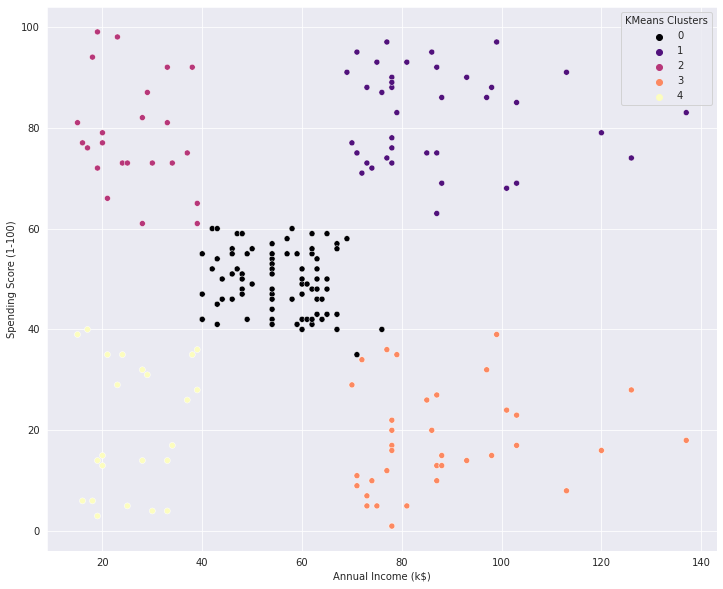

In [19]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=new_df["Annual Income (k$)"],y= new_df["Spending Score (1-100)"],hue=new_df["KMeans Clusters"],palette="magma")
#form this plot we can say that, if the mall make ads, it has higher chance to sell its product to the customer in cluster 0 and 3

<AxesSubplot:xlabel='Genre_Male', ylabel='Spending Score (1-100)'>

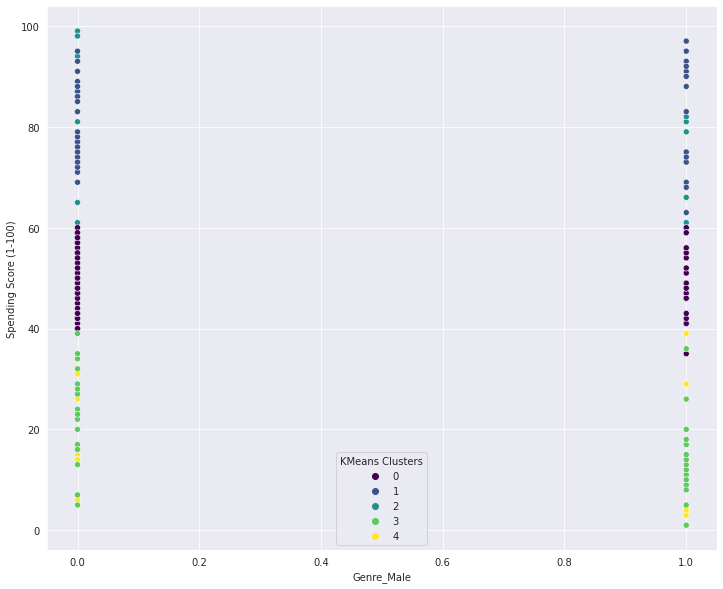

In [20]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=new_df["Genre_Male"],y= new_df["Spending Score (1-100)"],hue=new_df["KMeans Clusters"],palette="viridis")


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

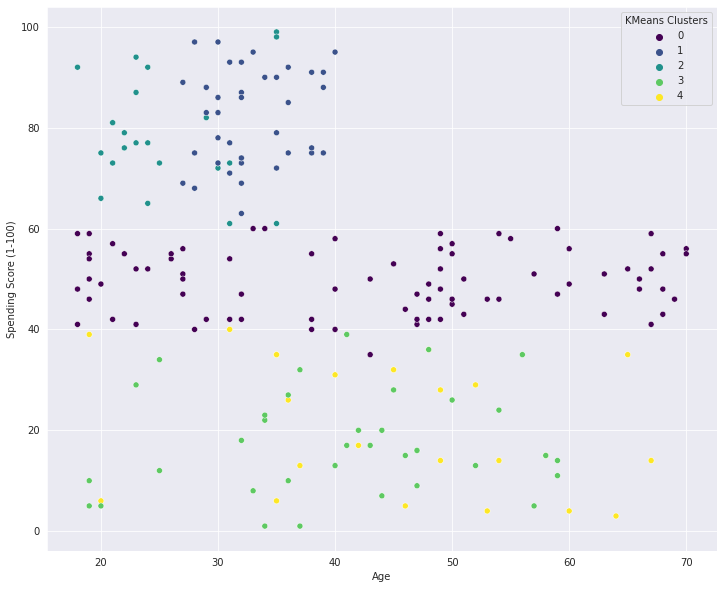

In [21]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=new_df["Age"],y= new_df["Spending Score (1-100)"],hue=new_df["KMeans Clusters"],palette="viridis")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


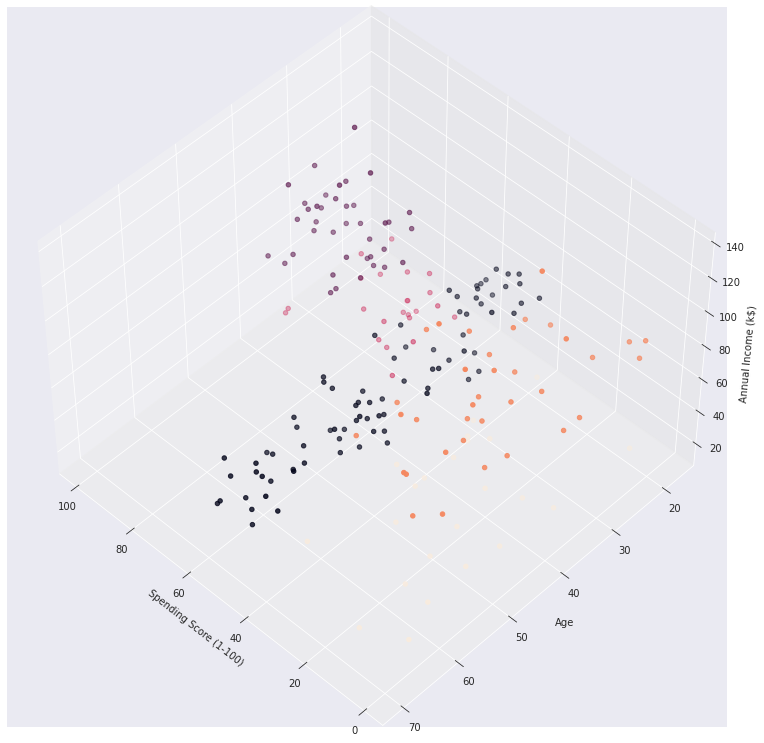

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(15, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$) ')
ax.scatter(X[:, 2], X[:, 0], X[:, 1], c= my_clusters.astype(np.float))
#Here we can see better the combination of three feature with different clusters

## 2. Hierarchical Clustering

<font color="blue">
Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters.

Strategies for hierarchical clustering generally fall into two types:[1]

1.Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

2.Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering[2] are usually presented in a dendrogram.

<font color="blue">
2.2. Using Dendogram in order to Find the Optimal Number of Clusters

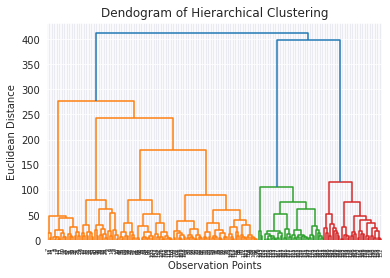

In [23]:
from scipy.cluster import hierarchy 
hier=hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))
plt.title("Dendogram of Hierarchical Clustering")
plt.xlabel("Observation Points")
plt.ylabel("Euclidean Distance")
plt.show() # it seems to have 3 or 5 clusters are better option

<font color="blue">
2.2. Using Agglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="ward")
agglomerative_clusters= ac.fit_predict(X)
agglomerative_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
df3= pd.DataFrame(agglomerative_clusters, columns=["Agglomerative Clusters"])
df3

,Agglomerative Clusters
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,1
197,2
198,1


In [26]:
new_df=pd.concat([new_df,df3],axis=1)
new_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,KMeans Clusters,Agglomerative Clusters
0,19,15,39,1,4,4
1,21,15,81,1,2,3
2,20,16,6,0,4,4
3,23,16,77,0,2,3
4,31,17,40,0,4,4
...,...,...,...,...,...,...
195,35,120,79,0,1,2
196,45,126,28,0,3,1
197,32,126,74,1,1,2
198,32,137,18,1,3,1


## 3. Comparison of Both Algorithms

Text(0.5, 1.0, 'According to Agglomerative Clusters')

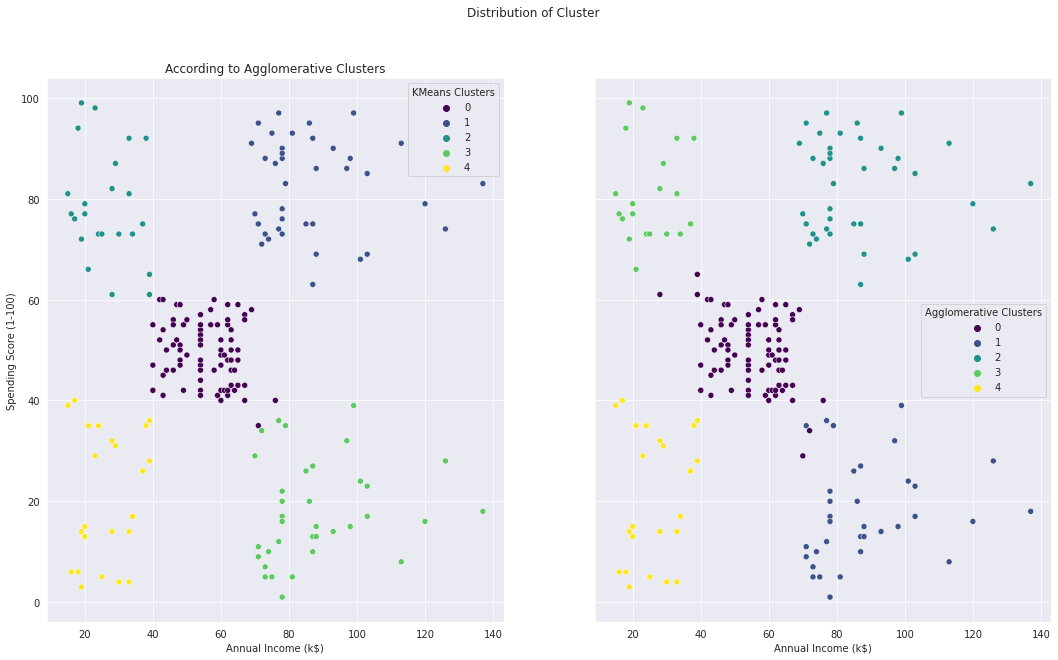

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)
fig.suptitle('Distribution of Cluster')

# KMeans Clustering
sns.scatterplot(ax=axes[0], x=new_df["Annual Income (k$)"], y=new_df["Spending Score (1-100)"],hue=new_df["KMeans Clusters"],palette="viridis")
axes[0].set_title("According to KMeans Clusters")
#Agglomerative Clustering
sns.scatterplot(ax=axes[1], x=new_df["Annual Income (k$)"], y=new_df["Spending Score (1-100)"],hue=new_df["Agglomerative Clusters"],palette="viridis")
axes[0].set_title("According to Agglomerative Clusters")


<font color="blue">
Above we test the accuracy of both clusters with each other. It seems both of them creates approximately same clusters regardless of the value difference in the entire dataset